# Decision Trees Exercises

![DecisionTree.png](Assets/DecisionTree.png)

# Learning Objectives

- Recognize Decision trees and how to use them for classification problems
- Recognize how to identify the best split and the factors for splitting
- Explain strengths and weaknesses of decision trees
- Explain how regression trees help with classifying continuous values
- Describe motivation for choosing Random Forest Classifier over Decision Trees
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware for Random Forest Classifier

# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code PRIOR to importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [2]:
pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 MB 6.5 MB/s eta 0:00:00


In [3]:
from __future__ import print_function
import os
data_path = ['../data']

# This listener will import Intel Extnsions for Scikit-learn optimized versions
# for any applicable imports from scikit-learn once this patch has been run

from sklearnex import patch_sklearn
patch_sklearn()

from io import StringIO
from IPython.display import Image, display

from sklearn.tree import export_graphviz
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 1

* Import the data and examine the features.
* We will be using all of them to predict `color` (white or red), but the colors feature will need to be integer encoded.

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Wine_Quality_Data.csv")
data.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
2941,8.4,0.58,0.27,12.15,0.033,37.0,116.0,0.99590,2.99,0.39,10.8,6,white
4009,7.0,0.16,0.26,7.30,0.047,30.0,220.0,0.99622,3.38,0.58,10.1,6,white
4004,6.6,0.23,0.18,8.50,0.044,59.0,188.0,0.99558,3.16,0.49,9.5,5,white
985,7.4,0.58,0.00,2.00,0.064,7.0,11.0,0.99562,3.45,0.58,11.3,6,red
3554,6.4,0.29,0.28,11.10,0.063,66.0,169.0,0.99730,2.89,0.57,9.0,5,white


In [6]:
data1 = data.copy()
data1['color'] = data1['color'].replace({'white':0, 'red':1})
data1.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
4892,6.8,0.170,0.35,1.80,0.040,29.0,84.0,0.98961,2.91,0.57,12.0,7,0
6091,6.0,0.190,0.37,9.70,0.032,17.0,50.0,0.99320,3.08,0.66,12.0,6,0
378,11.4,0.625,0.66,6.20,0.088,6.0,24.0,0.99880,3.11,0.99,13.3,6,1
1462,6.8,0.640,0.03,2.30,0.075,14.0,31.0,0.99545,3.36,0.58,10.4,6,1
5049,6.6,0.210,0.29,5.35,0.029,43.0,106.0,0.99112,2.93,0.43,11.5,7,0


## Question 2

* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by wine quality. If possible, preserve the indices of the split for question 5 below.
* Check the percent composition of each quality level for both the train and test data sets.

In [16]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=3)
sss.get_n_splits(data1, data.quality)
print(sss)
for i, (train_index, test_index) in enumerate(sss.split(data1, data.quality)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

StratifiedShuffleSplit(n_splits=1, random_state=3, test_size=0.2,
            train_size=None)
Fold 0:
  Train: index=[6166 3393 5135 ... 5456 1500 4473]
  Test:  index=[ 331 1729 5052 ... 1846 2096 3719]


## Question 3

* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves.
* Determine how many nodes are present and what the depth of this (very large) tree is.
* Using this tree, measure the prediction error in the train and test data sets. What do you think is going on here based on the differences in prediction error?

In [18]:
dt = DecisionTreeClassifier(max_depth=None, max_features=None, max_leaf_nodes=None)
dt.fit(data1.drop('color', axis=1), data1['color'])

n_nodes = dt.tree_.node_count
print(f"Number of nodes in the tree: {n_nodes}\n")

max_depth = dt.tree_.max_depth
print(f"Maximum depth of the tree: {max_depth}\n")

train_pred = dt.predict(data1.drop('color', axis=1))
test_pred = dt.predict(data1.drop('color', axis=1))

train_acc = accuracy_score(data1['color'], train_pred)
test_acc = accuracy_score(data1['color'], test_pred)

print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")


Number of nodes in the tree: 169

Maximum depth of the tree: 21

Train accuracy: 0.9996921656148992
Test accuracy: 0.9996921656148992


## Question 4

* Replace Decision Tree in the cell above with Random Forest algorithm
* from sklearn.ensemble import RandomForestClassifier
* patch sklearn to apply fast version from Intel Extensions for Sckit-learn*
* Instantiate RandomForestClassifier(random_state=42)
* Examine feature importance: dict(zip(X_train.columns, dt.feature_importances_))
* Compare Metrics of Decision Tree to Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(data1.drop('color', axis=1), data1['color'])

importances = dict(zip(data1.drop('color', axis=1).columns, rf.feature_importances_))
print(importances)

train_pred = rf.predict(data1.drop('color', axis=1))
test_pred = rf.predict(data1.drop('color', axis=1))

train_acc = accuracy_score(data1['color'], train_pred)
test_acc = accuracy_score(data1['color'], test_pred)

print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

{'fixed_acidity': 0.040289302373941425, 'volatile_acidity': 0.13784844816454755, 'citric_acid': 0.0132425515838079, 'residual_sugar': 0.045670958442057555, 'chlorides': 0.3049353409823402, 'free_sulfur_dioxide': 0.06511790121424846, 'total_sulfur_dioxide': 0.24540849248387822, 'density': 0.052682799200588715, 'pH': 0.02068538891098426, 'sulphates': 0.06206301296853686, 'alcohol': 0.009066274126526793, 'quality': 0.002989529548541996}
Train accuracy: 0.9996921656148992
Test accuracy: 0.9996921656148992


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Question 5

* Using grid search with cross validation, find a decision tree that performs well on the test data set. Use a different variable name for this decision tree model than in question 3 so that both can be used in question 6.
* Determine the number of nodes and the depth of this tree.
* Measure the errors on the training and test sets as before and compare them to those from the tree in question 3.

In [22]:
grid_search = GridSearchCV(dt, param_grid={'max_depth': range(1, 10), 'max_features': range(1, 13), 'max_leaf_nodes': range(2, 13)}, cv=5)
grid_search.fit(data1.drop('color', axis=1), data1['color'])
best_dt = grid_search.best_estimator_

n_nodes = best_dt.tree_.node_count
print(f"Number of nodes in the tree: {n_nodes}\n")

max_depth = best_dt.tree_.max_depth
print(f"Maximum depth of the tree: {max_depth}\n")

train_pred = best_dt.predict(data1.drop('color', axis=1))
test_pred = best_dt.predict(data1.drop('color', axis=1))

train_acc = accuracy_score(data1['color'], train_pred)
test_acc = accuracy_score(data1['color'], test_pred)

print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")


Number of nodes in the tree: 19

Maximum depth of the tree: 6

Train accuracy: 0.9863013698630136
Test accuracy: 0.9863013698630136


## Question 6

* Re-split the data into `X` and `y` parts, this time with `residual_sugar` being the predicted (`y`) data. *Note:* if the indices were preserved from the `StratifiedShuffleSplit` output in question 2, they can be used again to split the data.
* Using grid search with cross validation, find a decision tree **regression** model that performs well on the test data set.
* Measure the errors on the training and test sets using mean squared error.
* Make a plot of actual *vs* predicted residual sugar.

Train MSE: 7.386497944225477
Test MSE: 7.386497944225477


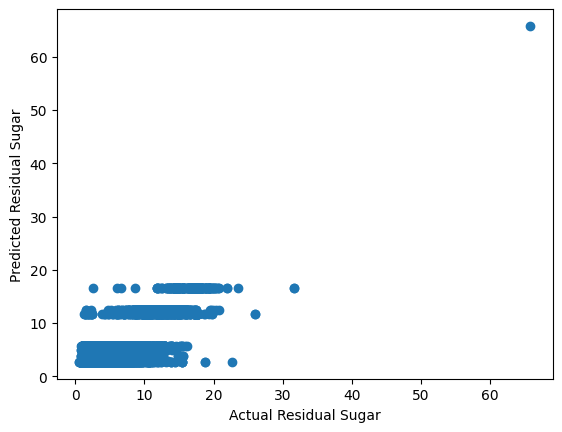

In [24]:
import matplotlib.pyplot as plt
X = data1.drop('residual_sugar', axis=1)
y = data1['residual_sugar']

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid={'max_depth': range(1, 10), 'max_features': range(1, 13), 'max_leaf_nodes': range(2, 13)}, cv=5)
grid_search.fit(X, y)
best_dt = grid_search.best_estimator_

train_pred = best_dt.predict(X)
test_pred = best_dt.predict(X)

train_mse = mean_squared_error(y, train_pred)
test_mse = mean_squared_error(y, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

plt.scatter(y, test_pred)
plt.xlabel("Actual Residual Sugar")
plt.ylabel("Predicted Residual Sugar")
plt.show()


## Question 7 *(Optional)*

This question is optional as it requires an additional command line program (GraphViz) and Python library (PyDotPlus). GraphViz can be installed with a package manager on Linux and Mac. For PyDotPlus, either `pip` or `conda` (`conda install -c conda-forge pydotplus`) can be used to install the library.

Once these programs are installed:

* Create a visualization of the decision tree from question 3, where wine color was predicted and the number of features and/or splits are not limited.
* Create a visualization of the decision tree from question 4, where wine color was predicted but a grid search was used to find the optimal depth and number of features.

The decision tree from question 5 will likely have too many nodes to visualize.